## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.014077 -0.413509 -0.127266  0.396018 -1.060857 -0.380187
1 -1.229600  1.406563  1.631022  0.695263 -1.565166  0.317681
2 -0.436067  0.613736 -0.969838  1.480595 -0.970482  0.881890
3  1.220921  0.988261 -1.098444  0.980472 -0.538860  1.235109
4  1.757713 -1.004277 -0.737807  0.013074 -1.708425 -0.545687


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0248022	total: 65.1ms	remaining: 1m 5s
1:	learn: 1.0150833	total: 65.6ms	remaining: 32.8s
2:	learn: 1.0036913	total: 66.1ms	remaining: 22s
3:	learn: 0.9910438	total: 66.7ms	remaining: 16.6s
4:	learn: 0.9823731	total: 67.2ms	remaining: 13.4s
5:	learn: 0.9718689	total: 67.8ms	remaining: 11.2s
6:	learn: 0.9600820	total: 68.2ms	remaining: 9.68s
7:	learn: 0.9493977	total: 68.8ms	remaining: 8.54s
8:	learn: 0.9392907	total: 69.3ms	remaining: 7.63s
9:	learn: 0.9308706	total: 69.7ms	remaining: 6.9s
10:	learn: 0.9206104	total: 70.4ms	remaining: 6.33s
11:	learn: 0.9103995	total: 70.8ms	remaining: 5.83s
12:	learn: 0.9010339	total: 71.4ms	remaining: 5.42s
13:	learn: 0.8922034	total: 72ms	remaining: 5.07s
14:	learn: 0.8842796	total: 72.6ms	remaining: 4.77s
15:	learn: 0.8750645	total: 73.1ms	remaining: 4.49s
16:	learn: 0.8675186	total: 73.5ms	remaining: 4.25s
17:	learn: 0.8572975	total: 74ms	remaining: 4.04s
18:	learn: 0.8482688	total: 74.5ms	remaining: 3.85s

90:	learn: 0.4326784	total: 108ms	remaining: 1.08s
91:	learn: 0.4289999	total: 109ms	remaining: 1.08s
92:	learn: 0.4259017	total: 109ms	remaining: 1.07s
93:	learn: 0.4224713	total: 110ms	remaining: 1.06s
94:	learn: 0.4191088	total: 110ms	remaining: 1.05s
95:	learn: 0.4151694	total: 111ms	remaining: 1.04s
96:	learn: 0.4126027	total: 111ms	remaining: 1.03s
97:	learn: 0.4092914	total: 112ms	remaining: 1.03s
98:	learn: 0.4061203	total: 112ms	remaining: 1.02s
99:	learn: 0.4030627	total: 112ms	remaining: 1.01s
100:	learn: 0.3988335	total: 113ms	remaining: 1s
101:	learn: 0.3954525	total: 113ms	remaining: 996ms
102:	learn: 0.3920980	total: 114ms	remaining: 989ms
103:	learn: 0.3888806	total: 114ms	remaining: 983ms
104:	learn: 0.3861754	total: 114ms	remaining: 975ms
105:	learn: 0.3824928	total: 115ms	remaining: 968ms
106:	learn: 0.3792896	total: 115ms	remaining: 962ms
107:	learn: 0.3759768	total: 116ms	remaining: 955ms
108:	learn: 0.3733102	total: 116ms	remaining: 950ms
109:	learn: 0.3700193	tot

253:	learn: 0.1276537	total: 187ms	remaining: 550ms
254:	learn: 0.1268231	total: 188ms	remaining: 549ms
255:	learn: 0.1257347	total: 188ms	remaining: 548ms
256:	learn: 0.1249975	total: 189ms	remaining: 546ms
257:	learn: 0.1240058	total: 189ms	remaining: 544ms
258:	learn: 0.1231960	total: 190ms	remaining: 543ms
259:	learn: 0.1221198	total: 190ms	remaining: 542ms
260:	learn: 0.1213494	total: 191ms	remaining: 540ms
261:	learn: 0.1204136	total: 191ms	remaining: 539ms
262:	learn: 0.1194462	total: 192ms	remaining: 537ms
263:	learn: 0.1183753	total: 192ms	remaining: 535ms
264:	learn: 0.1174877	total: 192ms	remaining: 534ms
265:	learn: 0.1168362	total: 193ms	remaining: 532ms
266:	learn: 0.1158358	total: 193ms	remaining: 530ms
267:	learn: 0.1151894	total: 194ms	remaining: 529ms
268:	learn: 0.1142897	total: 194ms	remaining: 528ms
269:	learn: 0.1134555	total: 195ms	remaining: 526ms
270:	learn: 0.1126973	total: 195ms	remaining: 525ms
271:	learn: 0.1119983	total: 195ms	remaining: 523ms
272:	learn: 

476:	learn: 0.0369921	total: 292ms	remaining: 320ms
477:	learn: 0.0367953	total: 292ms	remaining: 319ms
478:	learn: 0.0367121	total: 293ms	remaining: 318ms
479:	learn: 0.0365195	total: 293ms	remaining: 318ms
480:	learn: 0.0363140	total: 294ms	remaining: 317ms
481:	learn: 0.0362330	total: 294ms	remaining: 316ms
482:	learn: 0.0360485	total: 294ms	remaining: 315ms
483:	learn: 0.0359694	total: 295ms	remaining: 314ms
484:	learn: 0.0357894	total: 295ms	remaining: 313ms
485:	learn: 0.0356322	total: 296ms	remaining: 313ms
486:	learn: 0.0354549	total: 296ms	remaining: 312ms
487:	learn: 0.0352816	total: 296ms	remaining: 311ms
488:	learn: 0.0351285	total: 297ms	remaining: 310ms
489:	learn: 0.0349580	total: 298ms	remaining: 310ms
490:	learn: 0.0348083	total: 298ms	remaining: 309ms
491:	learn: 0.0346421	total: 298ms	remaining: 308ms
492:	learn: 0.0344994	total: 299ms	remaining: 307ms
493:	learn: 0.0343535	total: 299ms	remaining: 307ms
494:	learn: 0.0341915	total: 300ms	remaining: 306ms
495:	learn: 

637:	learn: 0.0200082	total: 370ms	remaining: 210ms
638:	learn: 0.0199262	total: 371ms	remaining: 210ms
639:	learn: 0.0198449	total: 371ms	remaining: 209ms
640:	learn: 0.0197328	total: 372ms	remaining: 208ms
641:	learn: 0.0196889	total: 372ms	remaining: 208ms
642:	learn: 0.0195716	total: 373ms	remaining: 207ms
643:	learn: 0.0195023	total: 373ms	remaining: 206ms
644:	learn: 0.0194031	total: 374ms	remaining: 206ms
645:	learn: 0.0193256	total: 374ms	remaining: 205ms
646:	learn: 0.0192587	total: 374ms	remaining: 204ms
647:	learn: 0.0191930	total: 375ms	remaining: 204ms
648:	learn: 0.0191499	total: 375ms	remaining: 203ms
649:	learn: 0.0190431	total: 376ms	remaining: 202ms
650:	learn: 0.0189789	total: 376ms	remaining: 202ms
651:	learn: 0.0189178	total: 377ms	remaining: 201ms
652:	learn: 0.0188296	total: 377ms	remaining: 200ms
653:	learn: 0.0187912	total: 378ms	remaining: 200ms
654:	learn: 0.0186971	total: 378ms	remaining: 199ms
655:	learn: 0.0186383	total: 379ms	remaining: 199ms
656:	learn: 

860:	learn: 0.0102481	total: 474ms	remaining: 76.5ms
861:	learn: 0.0101835	total: 475ms	remaining: 76ms
862:	learn: 0.0101514	total: 475ms	remaining: 75.4ms
863:	learn: 0.0101448	total: 475ms	remaining: 74.8ms
864:	learn: 0.0101204	total: 476ms	remaining: 74.3ms
865:	learn: 0.0101095	total: 476ms	remaining: 73.7ms
866:	learn: 0.0100708	total: 477ms	remaining: 73.1ms
867:	learn: 0.0100086	total: 477ms	remaining: 72.6ms
868:	learn: 0.0099538	total: 478ms	remaining: 72ms
869:	learn: 0.0099147	total: 478ms	remaining: 71.4ms
870:	learn: 0.0098905	total: 478ms	remaining: 70.9ms
871:	learn: 0.0098373	total: 479ms	remaining: 70.3ms
872:	learn: 0.0098074	total: 479ms	remaining: 69.7ms
873:	learn: 0.0097802	total: 480ms	remaining: 69.2ms
874:	learn: 0.0097596	total: 480ms	remaining: 68.6ms
875:	learn: 0.0097297	total: 481ms	remaining: 68ms
876:	learn: 0.0097035	total: 481ms	remaining: 67.5ms
877:	learn: 0.0096830	total: 482ms	remaining: 66.9ms
878:	learn: 0.0096766	total: 482ms	remaining: 66.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

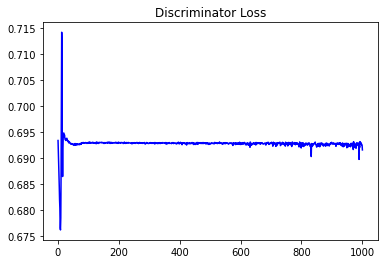

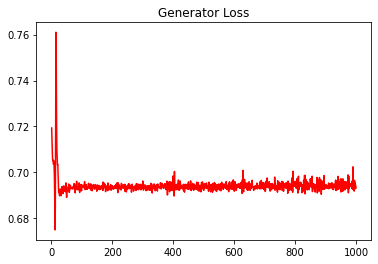

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06691464351350408


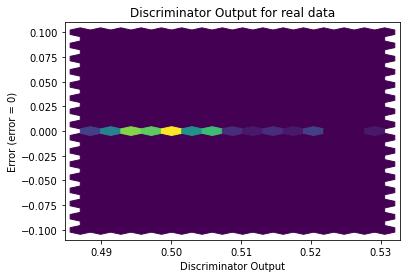

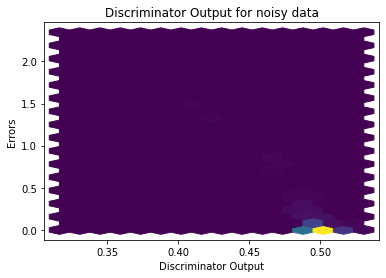

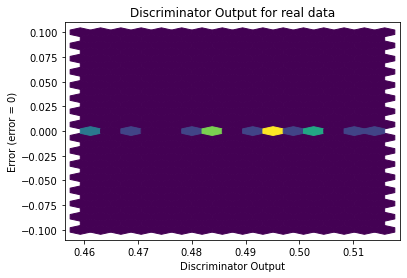

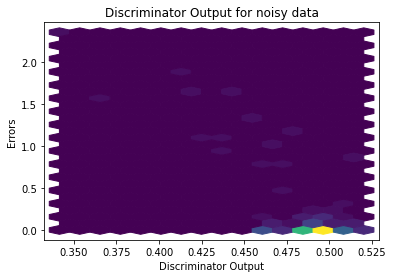

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


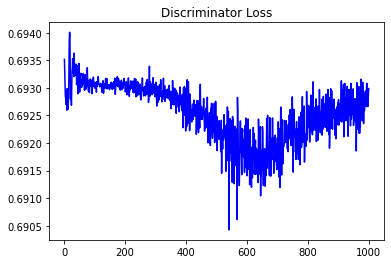

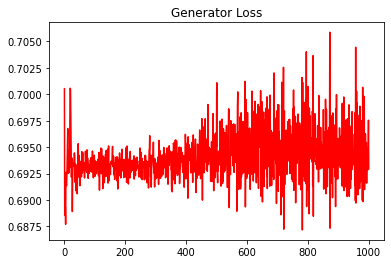

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.056572998961760816


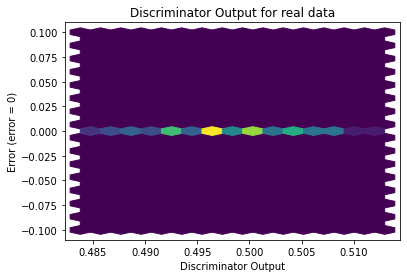

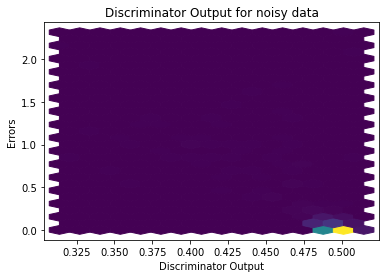

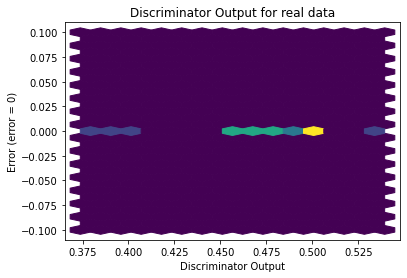

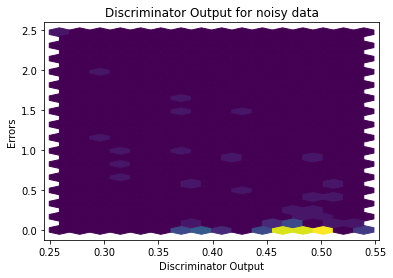

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1105]], requires_grad=True)
